# **Bayu Aditya**

# Import Data 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from imblearn.over_sampling import SMOTE

In [2]:
import sklearn.preprocessing as skpp
import sklearn.model_selection as skms
import sklearn.metrics as skme
import sklearn.model_selection as skms
import sklearn.linear_model as sklm
import sklearn.ensemble as sken
import sklearn.svm as sksvm

In [3]:
data_train = pd.read_csv('data_input/npl_train.csv')

In [4]:
dataX = data_train[['jumlah_kartu', 'outstanding', 'limit_kredit', 'tagihan',
       'total_pemakaian_tunai', 'total_pemakaian_retail',
       'sisa_tagihan_tidak_terbayar','rasio_pembayaran',
       'persentasi_overlimit', 'rasio_pembayaran_3bulan',
       'rasio_pembayaran_6bulan', 'skor_delikuensi',
       'jumlah_tahun_sejak_pembukaan_kredit', 'total_pemakaian',
       'sisa_tagihan_per_jumlah_kartu', 'sisa_tagihan_per_limit',
       'total_pemakaian_per_limit', 'pemakaian_3bln_per_limit',
       'pemakaian_6bln_per_limit', 'utilisasi_3bulan', 'utilisasi_6bulan']]

dataX = dataX.apply(lambda x : ((x - min(x))/(max(x) - min(x))))

dataY = data_train['flag_kredit_macet']

In [5]:
X_train, X_test, y_train, y_test = skms.train_test_split(dataX.values, dataY.values,
                                                        test_size = 0.2, random_state = 13)

In [6]:
np.bincount(y_train)

array([11283,  1111], dtype=int64)

In [7]:
np.bincount(y_test)

array([2851,  248], dtype=int64)

# Over Sampling

In [8]:
smt = SMOTE(n_jobs = 8)
X_smote, y_smote = smt.fit_sample(X_train, y_train)

In [9]:
np.bincount(y_smote)

array([11283, 11283], dtype=int64)

In [10]:
dataXsmote = pd.DataFrame(X_smote, columns=dataX.columns)
dataYsmote = pd.DataFrame(y_smote)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002565D009FD0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000002565F032940>]], dtype=object)

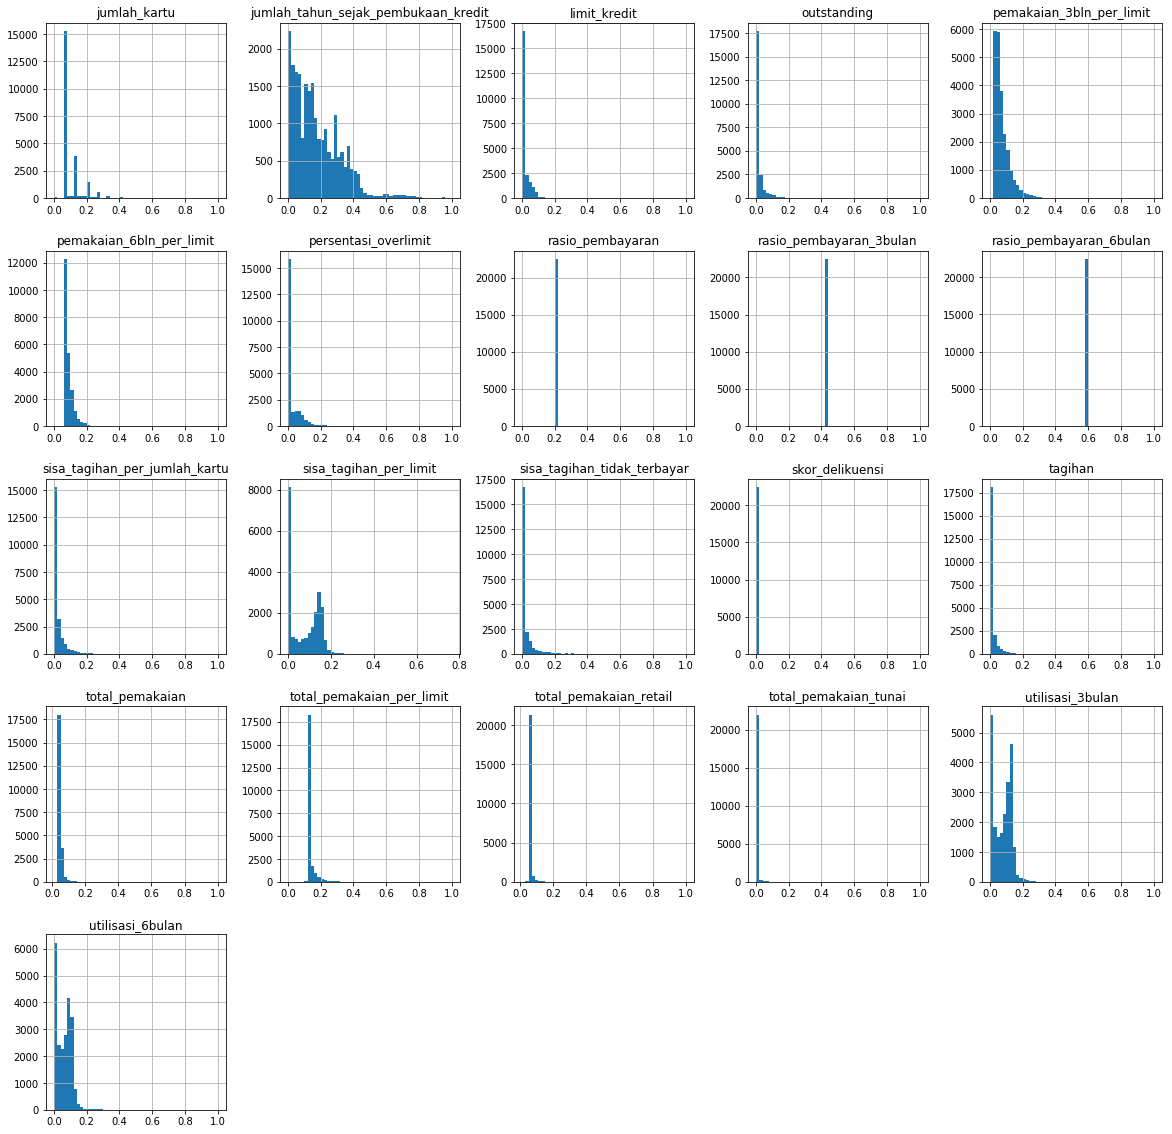

In [11]:
dataXsmote.hist(bins = 50, figsize = (20,20))

# SGD Classifier

## Classifier

In [92]:
param_grid = [{'alpha': np.linspace(1e-6, 1e-8, 10)}]
cv = 8

classifier = sklm.SGDClassifier(n_jobs = 8, random_state = 13)

grid_search = skms.GridSearchCV(classifier, param_grid, cv=cv, scoring='roc_auc', n_jobs = 8)
grid_search.fit(X_smote, y_smote)

y_sgd_test_pred = skms.cross_val_predict(grid_search.best_estimator_,
                                          X = X_test, y = y_test, cv = cv, method = 'predict')
y_sgd_train_pred = skms.cross_val_predict(grid_search.best_estimator_,
                                          X = X_smote, y = y_smote, cv = cv, method = 'predict')

y_sgd_test_score = skms.cross_val_predict(grid_search.best_estimator_,
                                           X = X_test, y = y_test, cv = cv, 
                                             method = 'decision_function')
y_sgd_train_score = skms.cross_val_predict(grid_search.best_estimator_,
                                           X = X_smote, y = y_smote, cv = cv, 
                                             method = 'decision_function')

skms.cross_val_score(grid_search.best_estimator_, X = X_smote, y = y_smote, cv = cv,
                     scoring = 'roc_auc')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\ProgramData\Anaconda3\lib\sit

array([ 0.78540233,  0.79389991,  0.78816638,  0.78889593,  0.78291484,
        0.80582617,  0.78931593,  0.79629848])

In [93]:
np.linspace(1e-6, 1e-8, 10)

array([  1.00000000e-06,   8.90000000e-07,   7.80000000e-07,
         6.70000000e-07,   5.60000000e-07,   4.50000000e-07,
         3.40000000e-07,   2.30000000e-07,   1.20000000e-07,
         1.00000000e-08])

In [94]:
grid_search.best_params_

{'alpha': 8.8999999999999995e-07}

In [95]:
grid_search.best_score_

0.79133941552513232

In [96]:
skme.confusion_matrix(y_test, y_sgd_test_pred)

array([[2040,  811],
       [ 151,   97]], dtype=int64)

## Performace Measure

In [47]:
def performance_result(classifier, X, y_true, y_pred, y_pred_score):    
    import sklearn.metrics as skme
    precision_score = skme.precision_score(y_true, y_pred)
    recall_score = skme.recall_score(y_true, y_pred)
    
    # Plot Precision and Recall Trade off
    precision, recall, threesold = skme.precision_recall_curve(y_true = y_true, probas_pred = y_pred_score)
    plt.plot(threesold, precision[:-1], label = 'precision')        #precision dan recall memiliki kelebihan 1 elemen
    plt.plot(threesold, recall[:-1], label = 'recall')
    plt.xlabel('Threesold')
    plt.legend(); plt.grid(); plt.show()

    plt.plot(recall, precision)
    plt.xlabel('recall'); plt.ylabel('precision')
    plt.grid(); plt.show()
    
    # ROC (Receiver Operating Curve) and AUC (Area Under Curve)
    fpr, tpr, threesold = skme.roc_curve(y_true, y_pred_score)
    
    AUC = skme.auc(x = fpr, y = tpr)
    
    plt.title('ROC (Receiver Operating Curve)')
    plt.plot(fpr, tpr)
    plt.plot([0,1],[0,1], 'k--')
    plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate')
    plt.grid(); plt.show()
    
    print(' Precision : ',precision_score, '\n Recall : ', recall_score, '\n AUC : ', AUC)

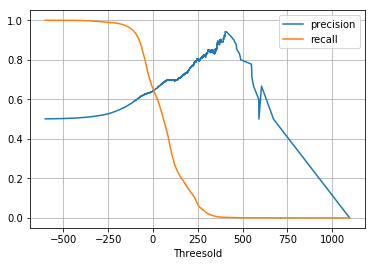

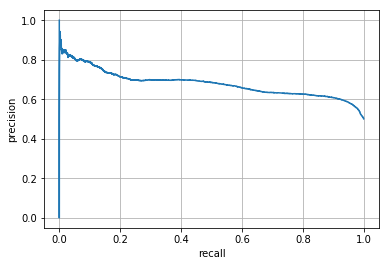

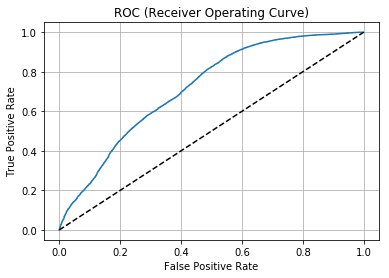

 Precision :  0.642032132002 
 Recall :  0.65523353718 
 AUC :  0.717718254623


In [97]:
performance_result(classifier, X_smote, y_smote, y_sgd_train_pred, y_sgd_train_score)

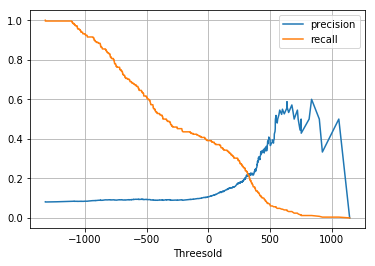

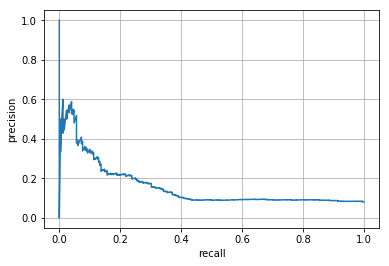

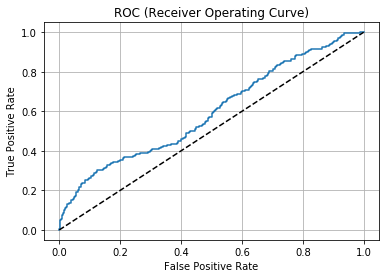

 Precision :  0.106828193833 
 Recall :  0.391129032258 
 AUC :  0.595760118125


In [89]:
performance_result(classifier, X_test, y_test, y_sgd_test_pred, y_sgd_test_score)

# Forest Classifier

## Classifier

In [25]:
forest_cf = sken.RandomForestClassifier(n_estimators = 1000, random_state = 13, n_jobs = 8)
forest_cf.fit(X = X_smote, y = y_smote)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=8,
            oob_score=False, random_state=13, verbose=0, warm_start=False)

In [28]:
y_forest_train_score = skms.cross_val_predict(forest_cf, X = X_smote, y = y_smote, cv = 3, method = 'predict_proba',
                                            n_jobs = 8)
y_forest_train_score0 = y_forest_train_score[:, 1]

In [29]:
y_forest_test_score = skms.cross_val_predict(forest_cf, X = X_test, y = y_test, cv = 3, method = 'predict_proba',
                                            n_jobs = 8)
y_forest_test_score0 = y_forest_test_score[:, 1]

In [30]:
y_forest_train_pred = []
y_forest_test_pred = []

for i in range(len(y_forest_train_score0)):
    if (y_forest_train_score0[i] <= 0.5):
        y_forest_train_pred.append(0)
    else:
        y_forest_train_pred.append(1)
        
for i in range(len(y_forest_test_score0)):
    if (y_forest_test_score0[i] <= 0.5):
        y_forest_test_pred.append(0)
    else:
        y_forest_test_pred.append(1)


In [40]:
(skms.cross_val_score(forest_cf, X = X_smote, y = y_smote, cv = 3, scoring = 'roc_auc',
                                            n_jobs = 8)).mean()

0.97908552119608361

In [41]:
(skms.cross_val_score(forest_cf, X = X_test, y = y_test, cv = 3, scoring = 'roc_auc',
                                            n_jobs = 8)).mean()

0.84532931925859833

**Data Train**

In [44]:
skme.confusion_matrix(y_train, forest_cf.predict(X_train))

array([[11283,     0],
       [    0,  1111]], dtype=int64)

**Data Train (SMOTE)**

In [35]:
skme.confusion_matrix(y_smote, y_forest_train_pred)

array([[10110,  1173],
       [  555, 10728]], dtype=int64)

**Data Test**

In [36]:
skme.confusion_matrix(y_test, y_forest_test_pred)

array([[2830,   21],
       [ 230,   18]], dtype=int64)

## Performance Measure

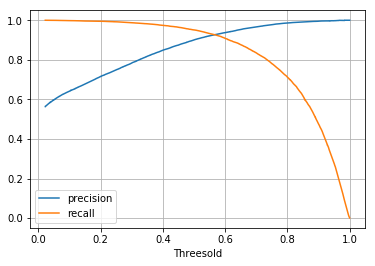

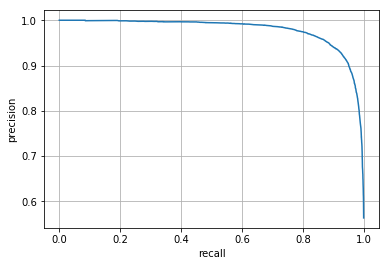

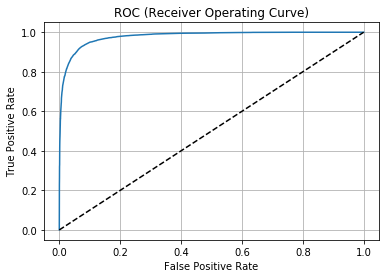

AUC :  0.978733978702


In [37]:
# Plot Precision and Recall Trade off
precision, recall, threesold = skme.precision_recall_curve(y_true = y_smote, probas_pred = y_forest_train_score0)
plt.plot(threesold, precision[:-1], label = 'precision')        #precision dan recall memiliki kelebihan 1 elemen
plt.plot(threesold, recall[:-1], label = 'recall')
plt.xlabel('Threesold')
plt.legend(); plt.grid(); plt.show()
plt.plot(recall, precision)
plt.xlabel('recall'); plt.ylabel('precision')
plt.grid(); plt.show()

# ROC (Receiver Operating Curve) and AUC (Area Under Curve)
fpr, tpr, threesold = skme.roc_curve(y_smote, y_forest_train_score0)
AUC = skme.auc(x = fpr, y = tpr)

plt.title('ROC (Receiver Operating Curve)')
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1], 'k--')
plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate')
plt.grid(); plt.show()
    
print('AUC : ', AUC)

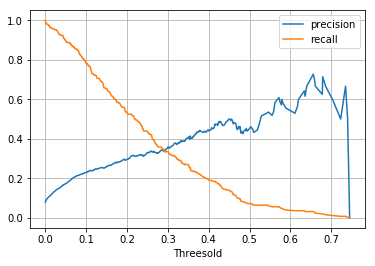

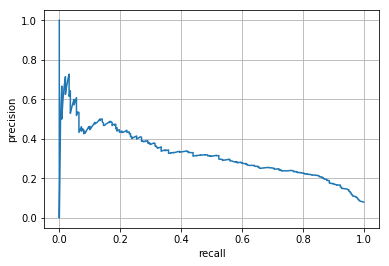

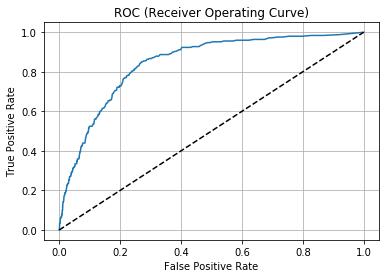

AUC :  0.844407310395


In [38]:
# Plot Precision and Recall Trade off
precision, recall, threesold = skme.precision_recall_curve(y_true = y_test, probas_pred = y_forest_test_score0)
plt.plot(threesold, precision[:-1], label = 'precision')        #precision dan recall memiliki kelebihan 1 elemen
plt.plot(threesold, recall[:-1], label = 'recall')
plt.xlabel('Threesold')
plt.legend(); plt.grid(); plt.show()
plt.plot(recall, precision)
plt.xlabel('recall'); plt.ylabel('precision')
plt.grid(); plt.show()

# ROC (Receiver Operating Curve) and AUC (Area Under Curve)
fpr, tpr, threesold = skme.roc_curve(y_test, y_forest_test_score0)
AUC = skme.auc(x = fpr, y = tpr)

plt.title('ROC (Receiver Operating Curve)')
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1], 'k--')
plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate')
plt.grid(); plt.show()
    
print('AUC : ', AUC)

# Forest Classifier (optimize)

## Classifier

In [15]:
param_grid = {    'bootstrap': [True],
    'max_depth': [80],
    'max_features': [3],
    'min_samples_leaf': [3],
    'min_samples_split': [8],
    'n_estimators': [1000]}
cv = 3

forest_cf = sken.RandomForestClassifier(random_state = 13, n_jobs = 8)
grid_search = skms.GridSearchCV(forest_cf, param_grid,  scoring = 'roc_auc', n_jobs = 8, cv = cv)
grid_search.fit(X = X_smote, y = y_smote)

GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=8,
            oob_score=False, random_state=13, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=8,
       param_grid={'bootstrap': [True], 'max_depth': [80], 'max_features': [3], 'min_samples_leaf': [3], 'min_samples_split': [8], 'n_estimators': [1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [16]:
grid_search.best_index_

0

In [17]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 80,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 1000}

In [19]:
grid_search.best_score_

0.96788070364803991

In [20]:
y_forest_test_score = skms.cross_val_predict(grid_search.best_estimator_, X = X_test, y = y_test, cv = 3, method = 'predict_proba',
                                            n_jobs = 8)
y_forest_test_score0 = y_forest_test_score[:, 1]

In [21]:
y_forest_train_pred = []
y_forest_test_pred = []
        
for i in range(len(y_forest_test_score0)):
    if (y_forest_test_score0[i] <= 0.5):
        y_forest_test_pred.append(0)
    else:
        y_forest_test_pred.append(1)

In [22]:
skme.confusion_matrix(y_test, y_forest_test_pred)

array([[2841,   10],
       [ 234,   14]], dtype=int64)

## Performance Measure

In [ ]:
# Plot Precision and Recall Trade off
precision, recall, threesold = skme.precision_recall_curve(y_true = y_smote, probas_pred = y_forest_train_score0)
plt.plot(threesold, precision[:-1], label = 'precision')        #precision dan recall memiliki kelebihan 1 elemen
plt.plot(threesold, recall[:-1], label = 'recall')
plt.xlabel('Threesold')
plt.legend(); plt.grid(); plt.show()
plt.plot(recall, precision)
plt.xlabel('recall'); plt.ylabel('precision')
plt.grid(); plt.show()

# ROC (Receiver Operating Curve) and AUC (Area Under Curve)
fpr, tpr, threesold = skme.roc_curve(y_smote, y_forest_train_score0)
AUC = skme.auc(x = fpr, y = tpr)

plt.title('ROC (Receiver Operating Curve)')
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1], 'k--')
plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate')
plt.grid(); plt.show()
    
print('AUC : ', AUC)

# SVC

## Classifier

In [20]:
param = [{'gamma': np.linspace(0,10,2), 'coef0': np.linspace(0,10,2), 'degree':np.linspace(0,3,2)}]

SVC_cf = sksvm.SVC(random_state = 13, kernel = 'poly')
SVC_cf.fit(X = X_smote, y = y_smote)

In [21]:
skme.confusion_matrix(y_smote, y_svc_train_pred)

array([[7372, 3911],
       [1917, 9366]], dtype=int64)

In [22]:
skme.confusion_matrix(y_test, y_svc_test_pred)

array([[2851,    0],
       [ 248,    0]], dtype=int64)

## Performance Measure

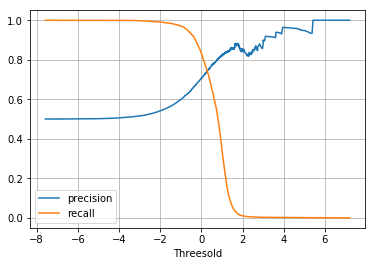

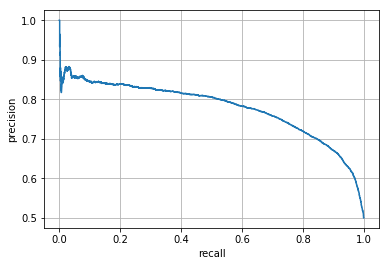

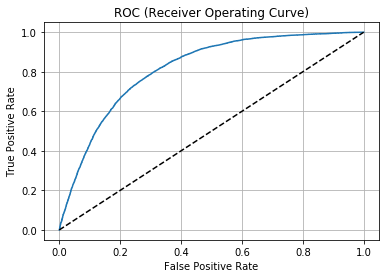

AUC :  0.815882860088


In [23]:
# Plot Precision and Recall Trade off
precision, recall, threesold = skme.precision_recall_curve(y_true = y_smote, probas_pred = y_svc_train_score)
plt.plot(threesold, precision[:-1], label = 'precision')        #precision dan recall memiliki kelebihan 1 elemen
plt.plot(threesold, recall[:-1], label = 'recall')
plt.xlabel('Threesold')
plt.legend(); plt.grid(); plt.show()
plt.plot(recall, precision)
plt.xlabel('recall'); plt.ylabel('precision')
plt.grid(); plt.show()

# ROC (Receiver Operating Curve) and AUC (Area Under Curve)
fpr, tpr, threesold = skme.roc_curve(y_smote, y_svc_train_score)
AUC = skme.auc(x = fpr, y = tpr)

plt.title('ROC (Receiver Operating Curve)')
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1], 'k--')
plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate')
plt.grid(); plt.show()
    
print('AUC : ', AUC)

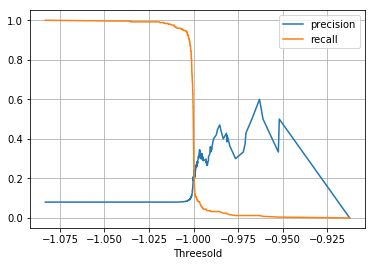

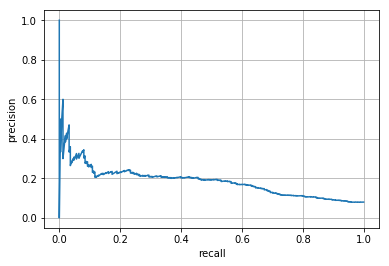

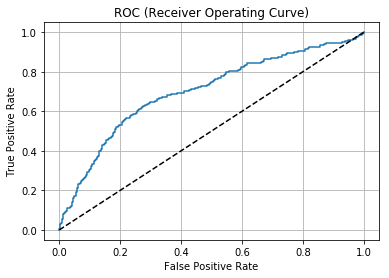

AUC :  0.6999355065


In [24]:
# Plot Precision and Recall Trade off
precision, recall, threesold = skme.precision_recall_curve(y_true = y_test, probas_pred = y_svc_test_score)
plt.plot(threesold, precision[:-1], label = 'precision')        #precision dan recall memiliki kelebihan 1 elemen
plt.plot(threesold, recall[:-1], label = 'recall')
plt.xlabel('Threesold')
plt.legend(); plt.grid(); plt.show()
plt.plot(recall, precision)
plt.xlabel('recall'); plt.ylabel('precision')
plt.grid(); plt.show()

# ROC (Receiver Operating Curve) and AUC (Area Under Curve)
fpr, tpr, threesold = skme.roc_curve(y_test, y_svc_test_score)
AUC = skme.auc(x = fpr, y = tpr)

plt.title('ROC (Receiver Operating Curve)')
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1], 'k--')
plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate')
plt.grid(); plt.show()
    
print('AUC : ', AUC)


# Ensemble